<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [621]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [622]:
import csv

#cells 2 -8 are about reading the file, removing quotes from cells and putting all data into a dictionary
rows = []

with open('sat_scores.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        rows.append(row)
print(rows[0:3])

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513']]


In [623]:
header = rows[0]
data = rows[1:]

In [624]:
header

['State', 'Rate', 'Verbal', 'Math']

In [625]:
data[:3]

[['CT', '82', '509', '510'],
 ['NJ', '81', '499', '513'],
 ['MA', '79', '511', '515']]

In [626]:
full_data = []

for row in data:
    final_rows = []
    for item in row:
        if item.isnumeric():
            final_rows.append(float(item))
        elif item == '':
            final_rows.append(-1)
        else:
            final_rows.append(item)
    full_data.append(final_rows)

print(full_data)

[['CT', 82.0, 509.0, 510.0], ['NJ', 81.0, 499.0, 513.0], ['MA', 79.0, 511.0, 515.0], ['NY', 77.0, 495.0, 505.0], ['NH', 72.0, 520.0, 516.0], ['RI', 71.0, 501.0, 499.0], ['PA', 71.0, 500.0, 499.0], ['VT', 69.0, 511.0, 506.0], ['ME', 69.0, 506.0, 500.0], ['VA', 68.0, 510.0, 501.0], ['DE', 67.0, 501.0, 499.0], ['MD', 65.0, 508.0, 510.0], ['NC', 65.0, 493.0, 499.0], ['GA', 63.0, 491.0, 489.0], ['IN', 60.0, 499.0, 501.0], ['SC', 57.0, 486.0, 488.0], ['DC', 56.0, 482.0, 474.0], ['OR', 55.0, 526.0, 526.0], ['FL', 54.0, 498.0, 499.0], ['WA', 53.0, 527.0, 527.0], ['TX', 53.0, 493.0, 499.0], ['HI', 52.0, 485.0, 515.0], ['AK', 51.0, 514.0, 510.0], ['CA', 51.0, 498.0, 517.0], ['AZ', 34.0, 523.0, 525.0], ['NV', 33.0, 509.0, 515.0], ['CO', 31.0, 539.0, 542.0], ['OH', 26.0, 534.0, 439.0], ['MT', 23.0, 539.0, 539.0], ['WV', 18.0, 527.0, 512.0], ['ID', 17.0, 543.0, 542.0], ['TN', 13.0, 562.0, 553.0], ['NM', 13.0, 551.0, 542.0], ['IL', 12.0, 576.0, 589.0], ['KY', 12.0, 550.0, 550.0], ['WY', 11.0, 547.0,

In [627]:
sat_d = dict(zip(header, full_data))
sat_d.keys()

dict_keys(['State', 'Rate', 'Verbal', 'Math'])

In [628]:
sat_d['Verbal']

['MA', 79.0, 511.0, 515.0]

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [629]:
pd.DataFrame.from_dict(sat_d)

,State,Rate,Verbal,Math
0,CT,NJ,MA,NY
1,82,81,79,77
2,509,499,511,495
3,510,513,515,505


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

In [630]:
sat_scores = pd.read_csv('sat_scores.csv')

In [631]:
sat_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [632]:
sat_scores.tail()

,State,Rate,Verbal,Math
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


In [633]:
sat_scores.columns

Index(['State', 'Rate', 'Verbal', 'Math'], dtype='object')

In [634]:
sat_scores.shape

(52, 4)

The difference between loading from file and inputting this dictionary is that the headers become rows when converting to a dataframe from a dictionary and I only need one line to create a dataframe with pandas. It speeds up the process.

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [635]:
sat_scores

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [636]:
sat_scores['State'].unique()

array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
       'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
       'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], dtype=object)

In [637]:
sat_scores.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


Dataframe is clean, we have run through all cells to ensure data integrity. From the summary stats, what we can infer is the data appears to be about the SAT scores of all the US states so decided to read abit more into it here: https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate. What we can note is states with a lower participation rate have 'higher scores' due to the best students taking the test (possible bias).

In [638]:
sat_scores.sort_values(['Rate'])

,State,Rate,Verbal,Math
49,ND,4,592,599
48,SD,4,577,582
50,MS,4,566,551
47,IA,5,593,603
46,UT,5,575,570
45,AR,6,562,550
44,WI,6,584,596
43,LA,7,564,562
42,MO,8,577,577
41,OK,8,567,561


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [639]:
sats_dict={
    'State':{'type':'object','describe':'USA State'},
    'Rate':{'type':'int64','describe':'SAT Pass Rate'}, 
    'Verbal':{'type':'int64','describe':'SAT Reading and Writing Average Test Score'},
    'Math':{'type':'int64','describe':'SAT Math Average Test Score'},
    'Shape':{'Rows':sat_scores.shape[0],'Columns':sat_scores.shape[1]}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

/Users/shaleniiedevi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


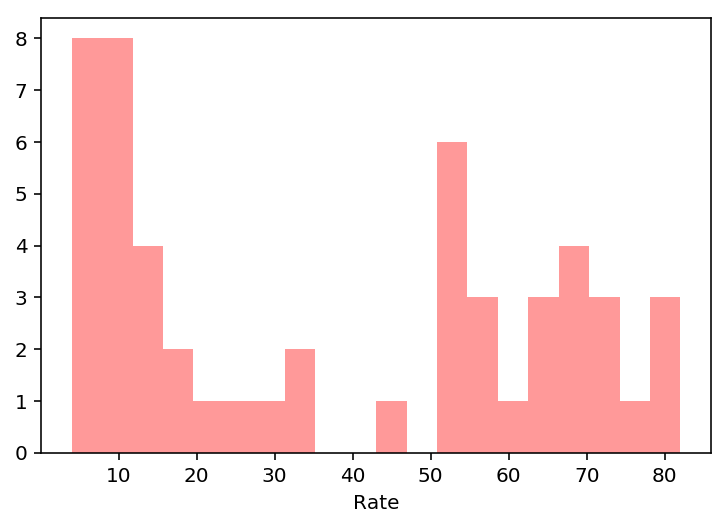

In [640]:
#rate
sns.distplot(sat_scores['Rate'], bins = 20, kde=False, color='r')

/Users/shaleniiedevi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


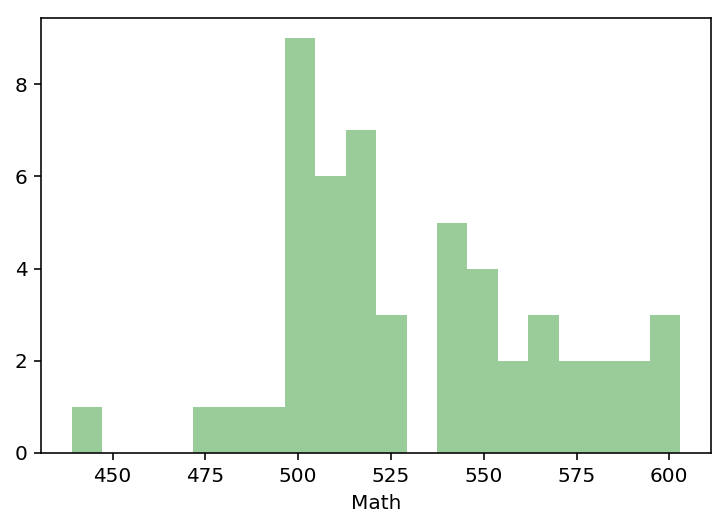

In [641]:
#math
sns.distplot(sat_scores['Math'], bins = 20, kde=False, color ='g')

/Users/shaleniiedevi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


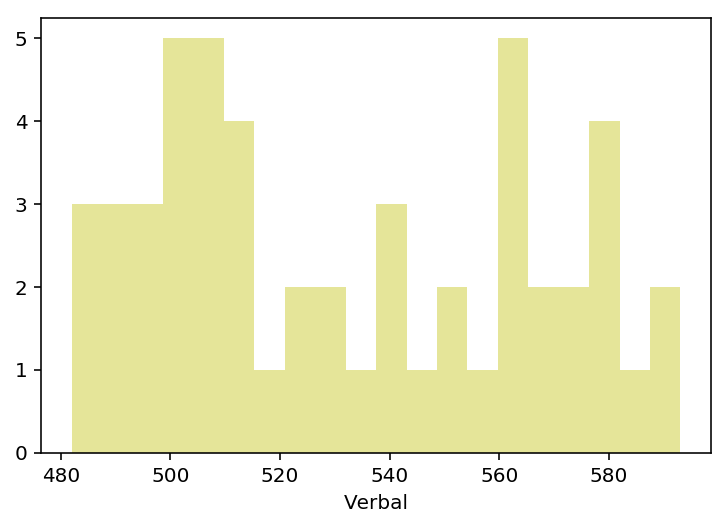

In [642]:
#verbal
sns.distplot(sat_scores['Verbal'], bins = 20, kde=False, color = 'y')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

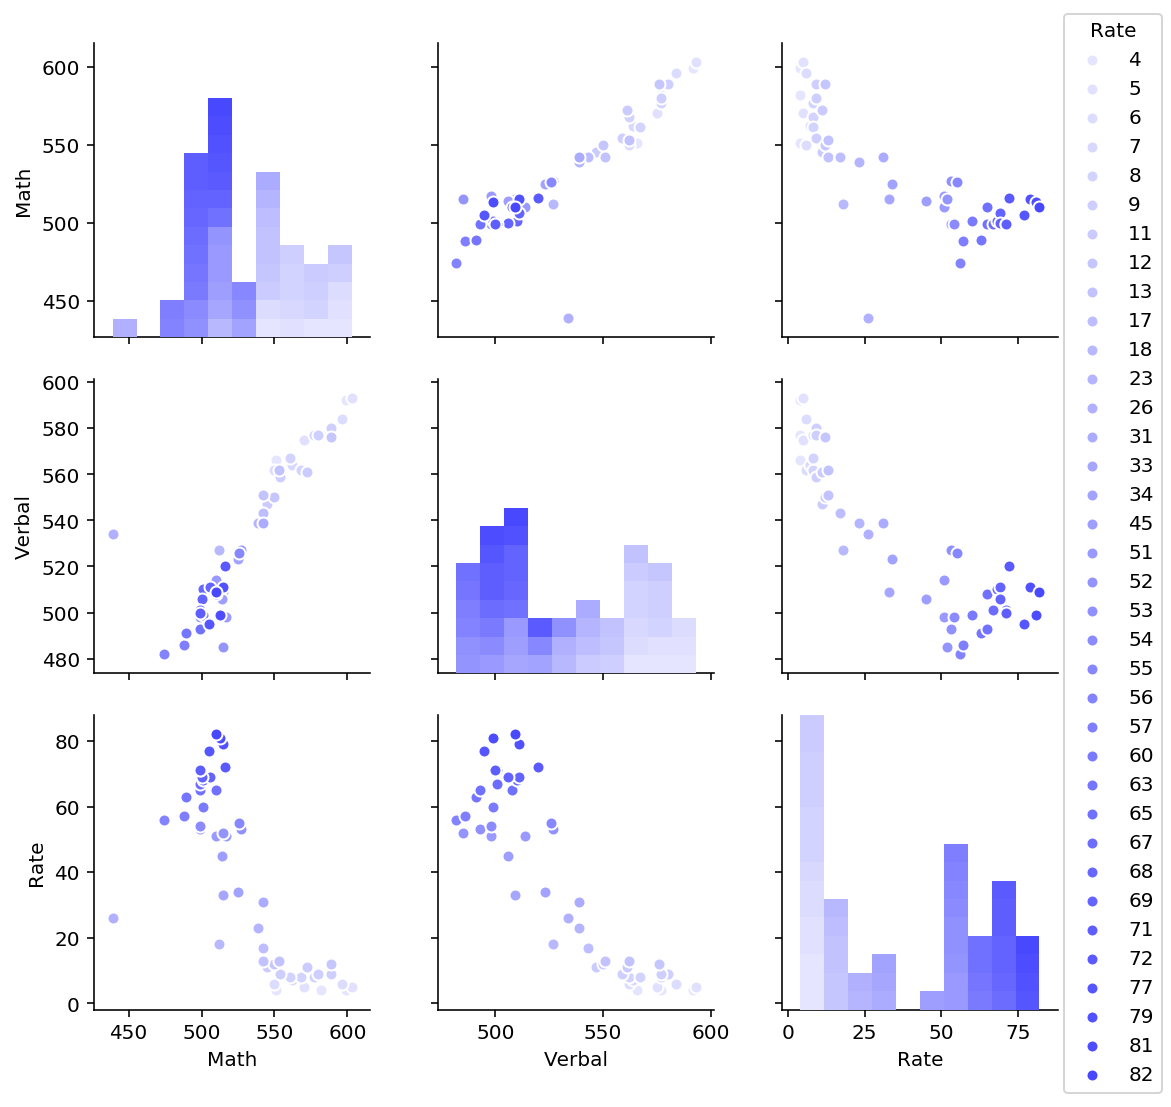

In [643]:
sns.pairplot(sat_scores[['Math', 'Verbal', 'Rate']], hue= 'Rate', palette=sns.light_palette("blue", len(sat_scores['Rate'])))

A pairs plot allows us to see both distribution of single variables and relationships between two variables. So given what I had read in the article, I expected to see the visualization that the lower the participation rate, the higher the scores. This can be seen from the last row graphs where the lighter blue shade suggests a lower particpation rate in the rate range is related to higher math and verbal scores.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

<Figure size 432x288 with 0 Axes>

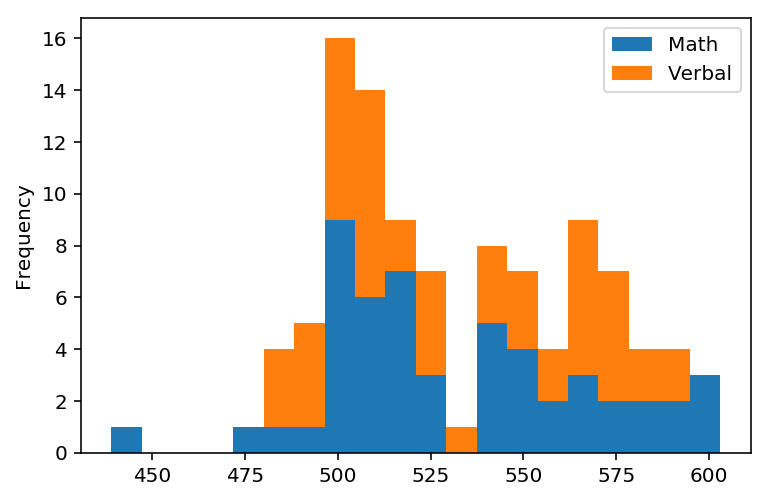

In [644]:
plt.figure();
sat_scores[['Math','Verbal']].plot.hist(stacked=True,bins=20)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

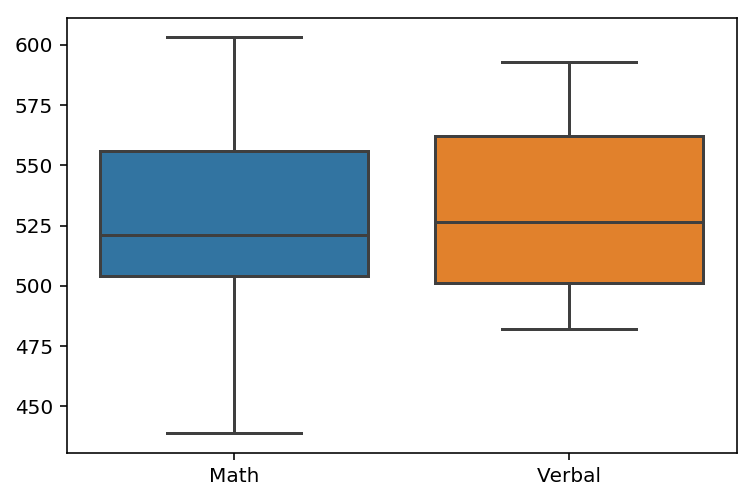

In [645]:
sns.boxplot(data=sat_scores[['Math','Verbal']])

Boxplots appear to represent the range of data better than histograms. The min/max and outliers are faster to visualize. 

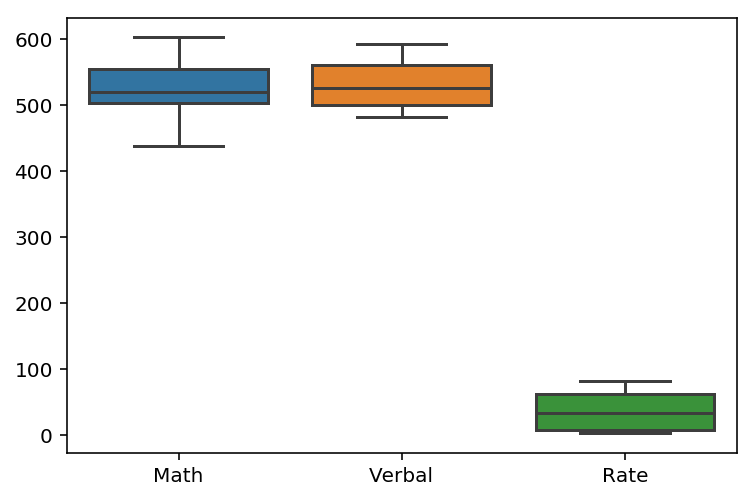

In [646]:
sns.boxplot(data=sat_scores[['Math','Verbal', 'Rate']])

Plotting 3 columns makes it hard to visualize the relationships between the datasets. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [647]:
sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].mean()]['State']
print('The mean Verbal score is:', sat_scores['Verbal'].mean())
print('The no. of states above Verbal mean is:', sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].mean()]['State'].count())

The mean Verbal score is: 532.0192307692307
The no. of states above Verbal mean is: 24


24 states being above the mean might indicate a normal distribution but let's also check for skewness. 

In [648]:
sat_scores['Verbal'].skew()

0.2603119512367809

It appears that Verbal has a postivie right hand skew. 

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [649]:
sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].median()]['State']
print('The median Verbal score is:', sat_scores['Verbal'].median())
print('The no. of states above Verbal median is:', sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].median()]['State'].count())

The median Verbal score is: 526.5
The no. of states above Verbal median is: 26


The list of states higher than average mean and median appear to be about the same so it doesn't appear to be something to be looked into further. 

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [650]:
sat_scores['ScoreDiff'] = sat_scores['Verbal'] - sat_scores['Math']
sat_scores.head()

,State,Rate,Verbal,Math,ScoreDiff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [651]:
#greatest gap where verbal > math
sat_scores.sort_values(by='ScoreDiff',ascending=False).head(3)

,State,Rate,Verbal,Math,ScoreDiff
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [652]:
#greatest gap where verbal < math
sat_scores.sort_values(by='ScoreDiff',ascending=True).head(3)

,State,Rate,Verbal,Math,ScoreDiff
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [653]:
sat_scores_correlation = sat_scores[['Rate', 'Verbal', 'Math']].corr(method='pearson')
print(sat_scores_correlation)

            Rate    Verbal      Math
Rate    1.000000 -0.886432 -0.773746
Verbal -0.886432  1.000000  0.899871
Math   -0.773746  0.899871  1.000000


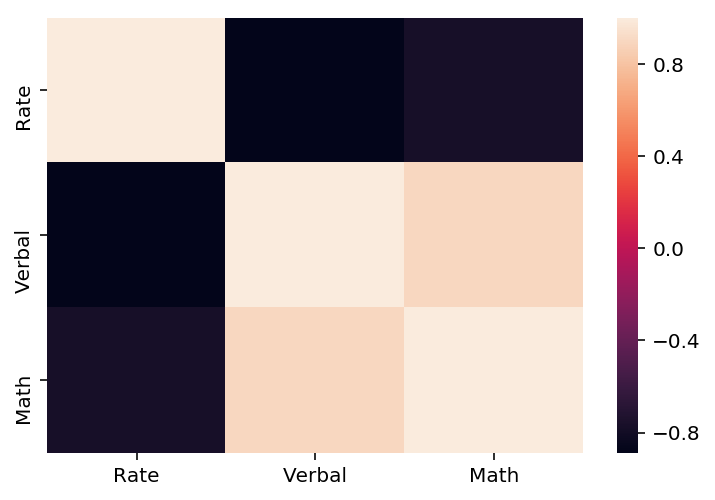

In [654]:
sns.heatmap(sat_scores_correlation)

We can see the correlation between Math and Verbal appear positive however both socres have a negative correlation against Rate. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [655]:
sat_scores.describe()

,Rate,Verbal,Math,ScoreDiff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<b>Count</b>- the number of cells (rows).<br>
<b>Mean</b>- the average of the values in the column.<br>
<b>Std</b>- the standard deviation.<br>
<b>Min</b>- the minimum value.<br>
<b>25%</b>- the 25th percentile of the values.<br>
<b>50%</b>- the 50th percentile of the values (which is also the median).<br>
<b>75%</b>- the 75th percentile of the values.<br>
<b>Max</b>- the maximum value.<br>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [656]:
sat_scores[['Rate','Verbal','Math']].cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [657]:
drugs = pd.read_csv('./drug-use-by-age.csv')
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


Immediate observation is there are pairs in the datasets - use with frequency. N column appears to be the no. of users. 

In [658]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

Some columns that should be float are object. Let's find out why with a test on cocaine frequency.

In [659]:
drugs.groupby('cocaine-frequency').size()

cocaine-frequency
-       1
1.0     1
15.0    1
36.0    1
4.0     1
5.0     6
5.5     2
6.0     1
7.0     1
8.0     2
dtype: int64

In [660]:
drugs['cocaine-frequency'].sort_values().unique()

array(['-', '1.0', '15.0', '36.0', '4.0', '5.0', '5.5', '6.0', '7.0',
       '8.0'], dtype=object)

The columns are objects because of the '-', we will convert the object columns to float by replacing the '-' with 0 and with pd.to_numeric and run a check to see if all is done right in the next 2 cells. 

In [661]:
drugs['cocaine-frequency'] = drugs['cocaine-frequency'].str.replace('-','0')
drugs['cocaine-frequency'] = pd.to_numeric(drugs['cocaine-frequency'])

drugs['crack-frequency'] = drugs['crack-frequency'].str.replace('-','0')
drugs['crack-frequency'] = pd.to_numeric(drugs['crack-frequency'])

drugs['heroin-frequency'] = drugs['heroin-frequency'].str.replace('-','0')
drugs['heroin-frequency'] = pd.to_numeric(drugs['heroin-frequency'])

drugs['inhalant-frequency'] = drugs['inhalant-frequency'].str.replace('-','0')
drugs['inhalant-frequency'] = pd.to_numeric(drugs['inhalant-frequency'])

drugs['oxycontin-frequency'] = drugs['oxycontin-frequency'].str.replace('-','0')
drugs['oxycontin-frequency'] = pd.to_numeric(drugs['oxycontin-frequency'])

drugs['meth-frequency'] = drugs['meth-frequency'].str.replace('-','0')
drugs['meth-frequency'] = pd.to_numeric(drugs['meth-frequency'])

In [662]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

Data cleaning done!

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

Let's create a correlation dataframe and heatmap first to get a full visual overview of what we are working with.

In [663]:
drugs_corr = drugs.corr(method='pearson')
print(drugs_corr)

                                n  alcohol-use  alcohol-frequency  \
n                        1.000000     0.310512           0.313431   
alcohol-use              0.310512     1.000000           0.897889   
alcohol-frequency        0.313431     0.897889           1.000000   
marijuana-use           -0.169007     0.594165           0.260219   
marijuana-frequency      0.135597     0.920425           0.818769   
cocaine-use             -0.021565     0.773458           0.577601   
cocaine-frequency        0.388318     0.260301           0.317172   
crack-use                0.281797     0.877378           0.785050   
crack-frequency          0.574629     0.337802           0.364267   
heroin-use               0.007798     0.677614           0.546194   
heroin-frequency         0.617432     0.396779           0.432405   
hallucinogen-use        -0.295302     0.463702           0.182184   
hallucinogen-frequency   0.008743    -0.346643          -0.174622   
inhalant-use            -0.368395 

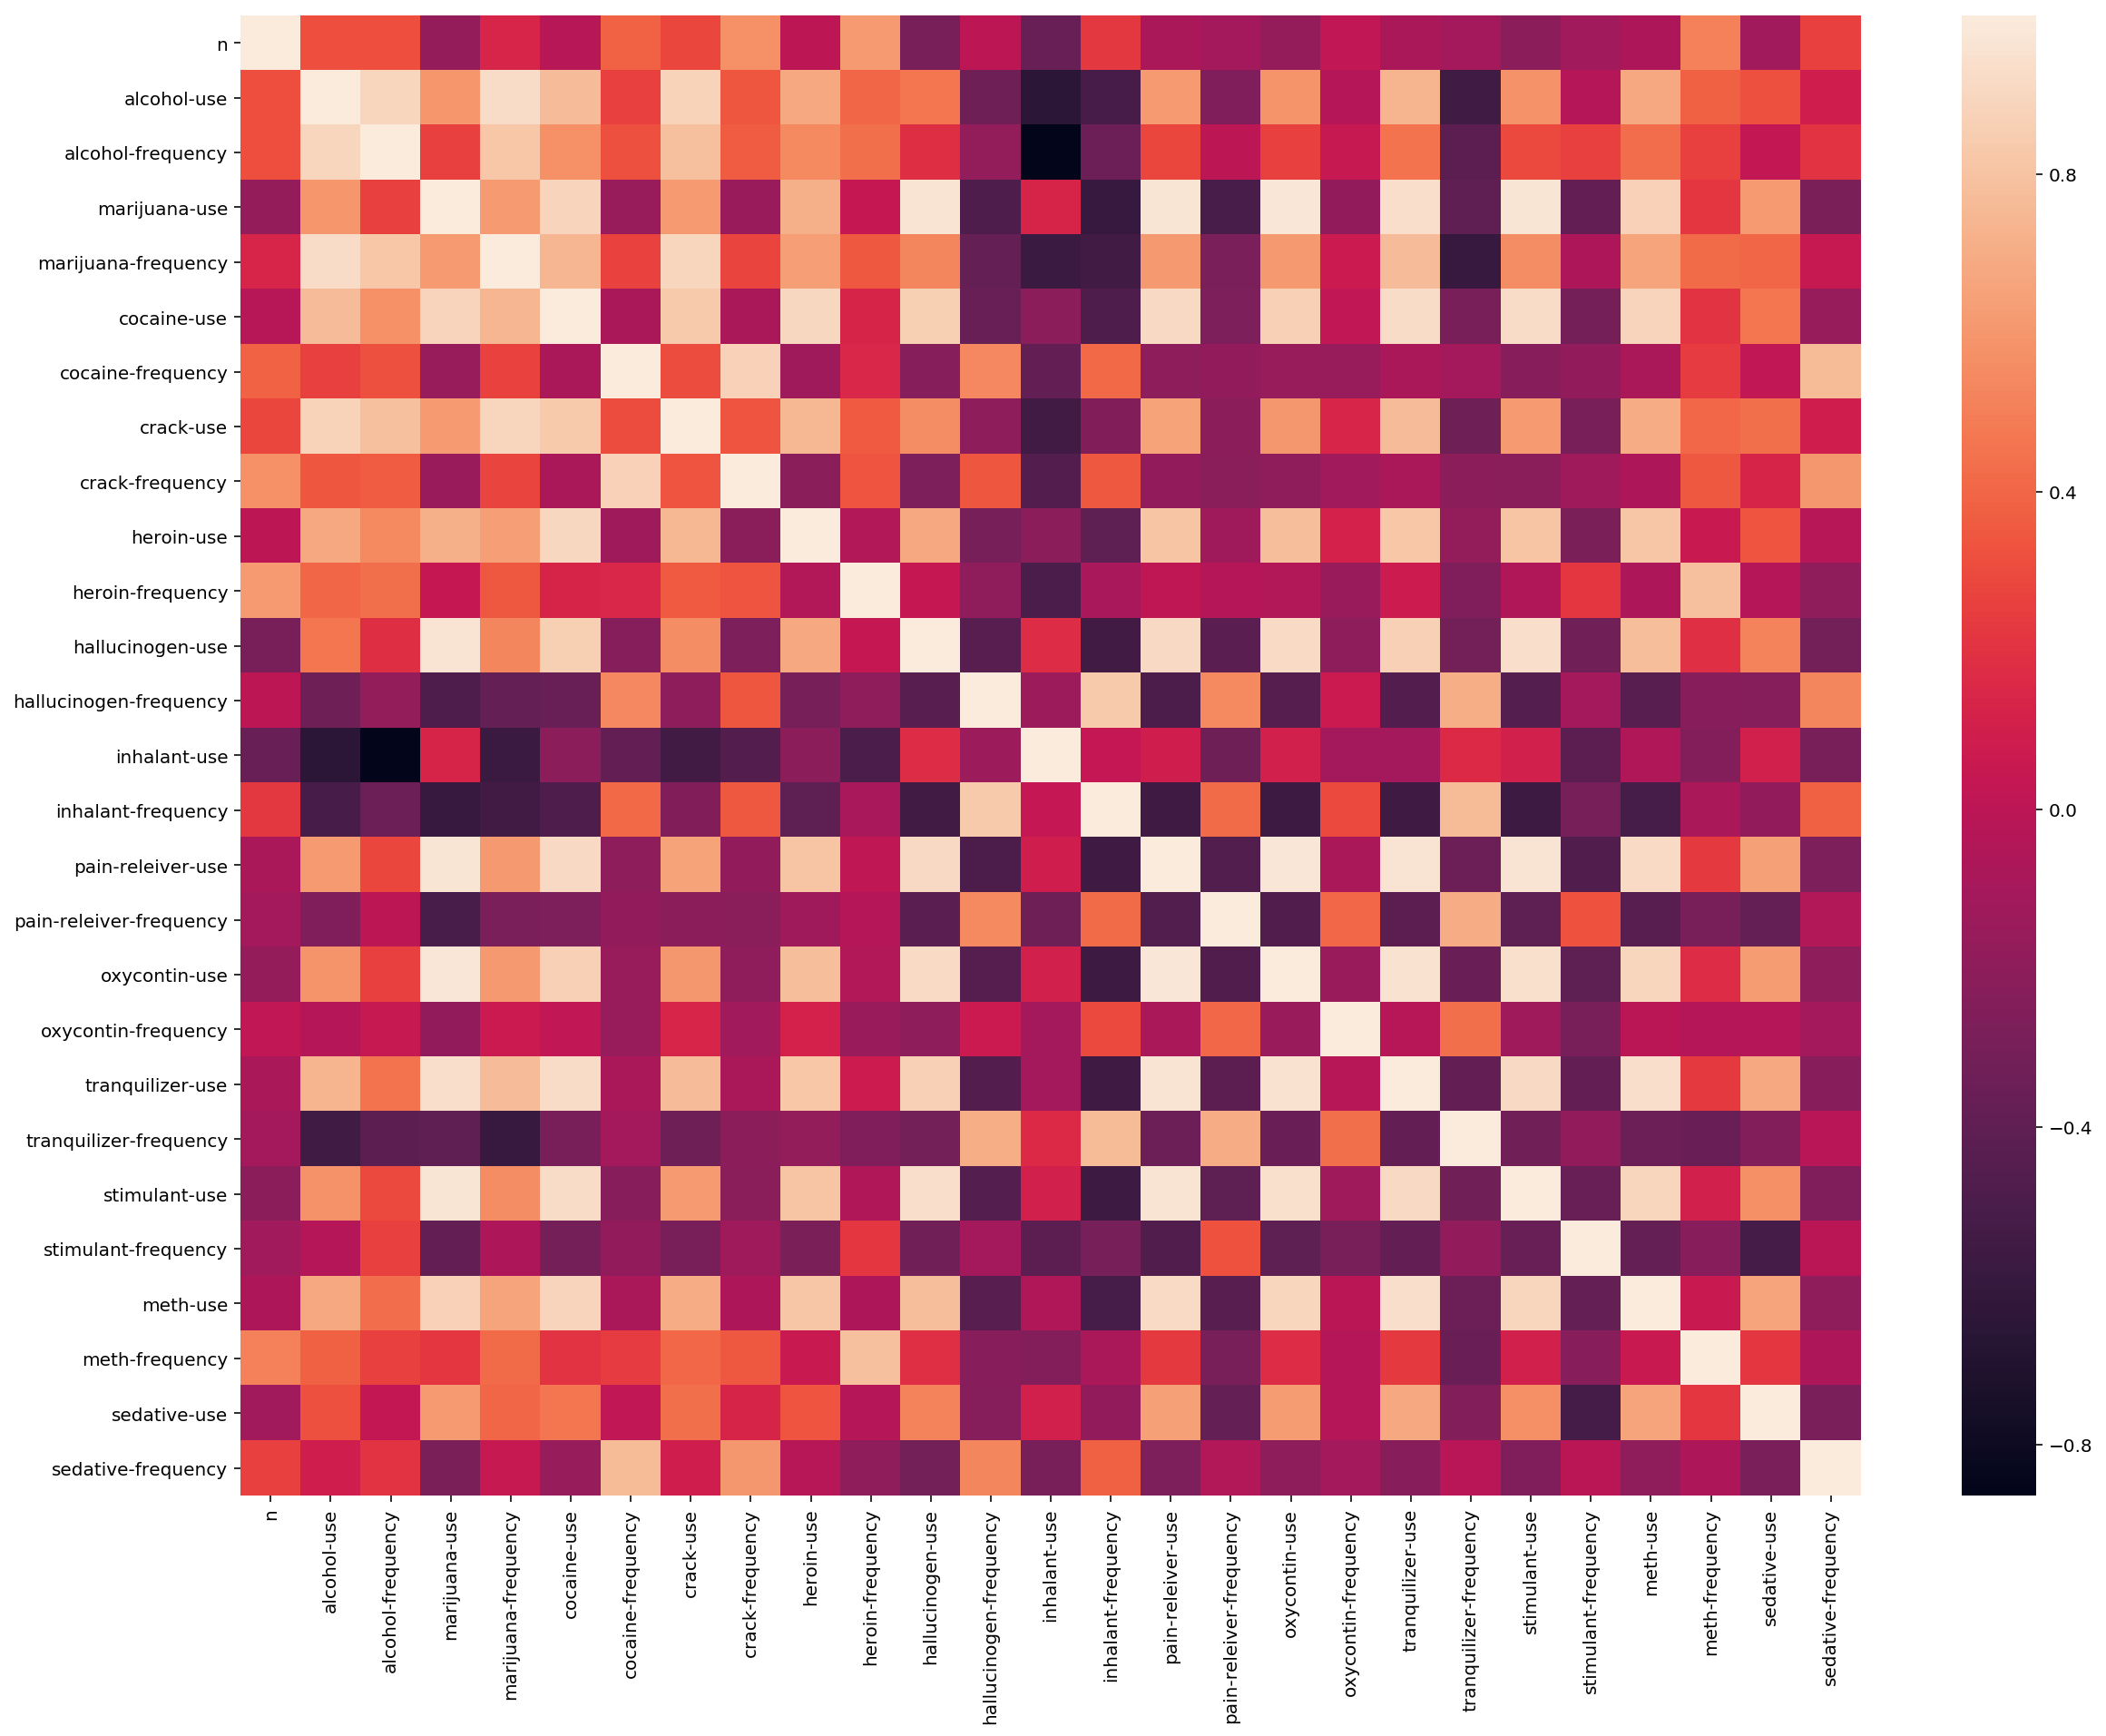

In [664]:
plt.subplots(figsize=(20,15))
sns.heatmap(drugs_corr)

Unable to read much given there is both use and frequency. Let's break it down to 2 dataframes - one for Drug Use and the other for Drug Frequency and see if there are any correlations between drugs. 

In [665]:
#create a drug use dataframe by age and users count
drugs_use = pd.DataFrame()
cols = drugs.columns

drugs_use['age'] = drugs['age']
drugs_use['n'] = drugs['n']

for col in cols:
    if 'use' in col:
        drugs_use[col] = drugs[col]
drugs_use.head()

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


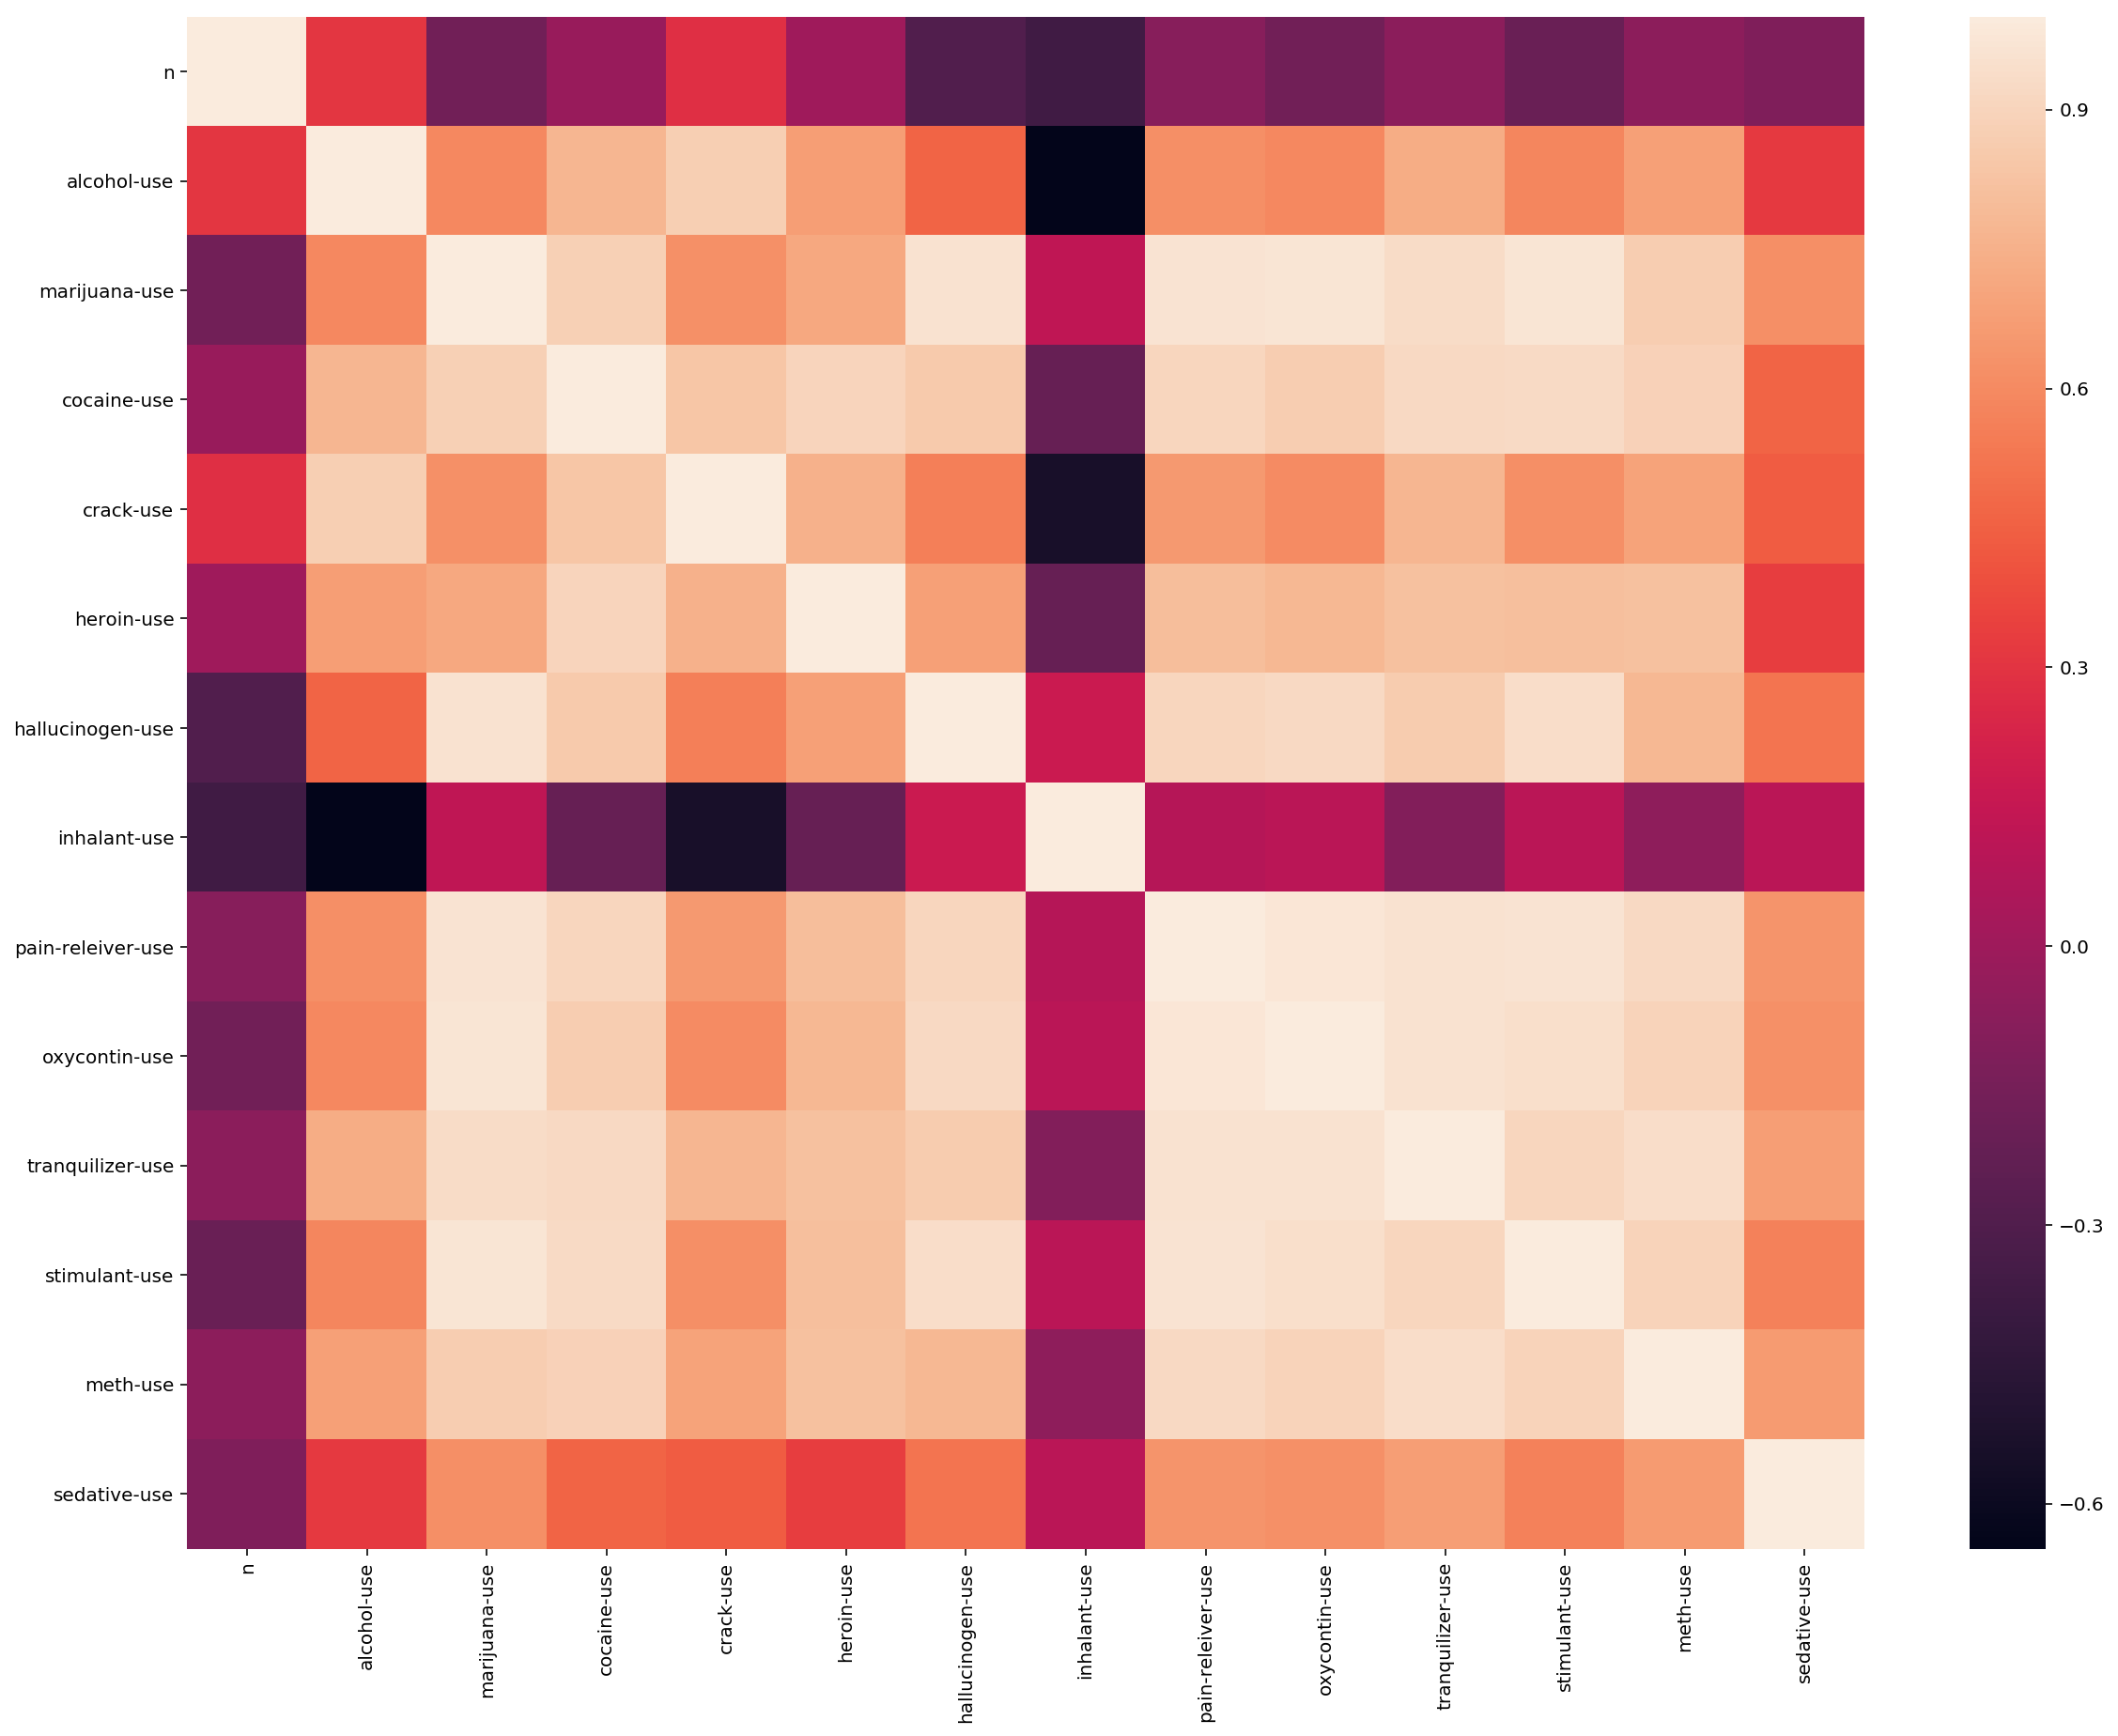

In [666]:
#create a drugs use heatmap 
drugs_use_corr = drugs_use.corr(method='pearson')
plt.subplots(figsize=(20,15))
sns.heatmap(drugs_use_corr)

Let's explore the mean overall drug use below. 

In [667]:
drugs_use_new = drugs_use.copy()
del drugs_use_new['n']
dun_mean = drugs_use_new.mean().sort_values(ascending=False)
dun_mean

alcohol-use          55.429412
marijuana-use        18.923529
pain-releiver-use     6.270588
hallucinogen-use      3.394118
tranquilizer-use      2.805882
cocaine-use           2.176471
stimulant-use         1.917647
inhalant-use          1.388235
oxycontin-use         0.935294
meth-use              0.382353
heroin-use            0.352941
crack-use             0.294118
sedative-use          0.282353
dtype: float64

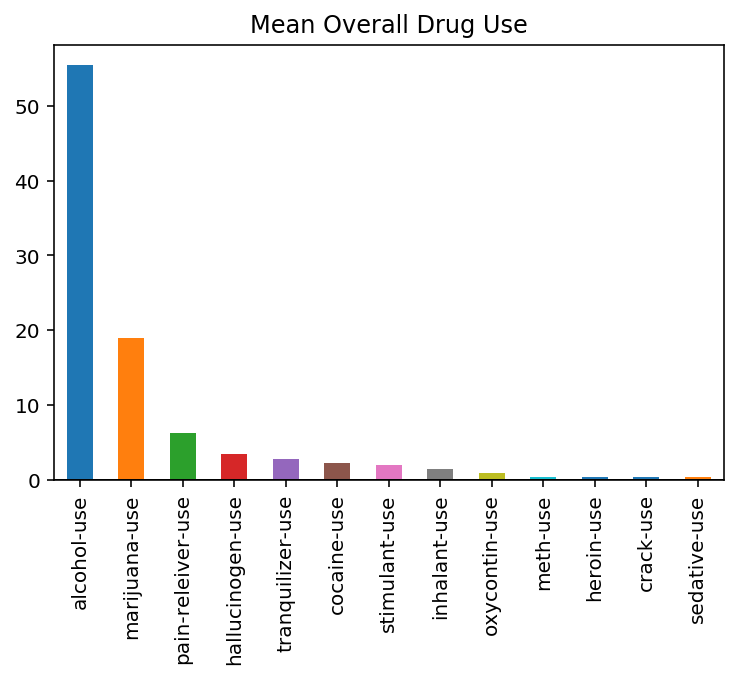

In [668]:
plt.figure()
dun_mean.plot.bar(title = 'Mean Overall Drug Use'); plt.axhline(0, color='k')

In [669]:
#create a drug frequency dataframe by age and users count
drugs_freq = pd.DataFrame()
cols = drugs.columns

drugs_freq['age'] = drugs['age']
drugs_freq['n'] = drugs['n']

for col in cols:
    if 'frequency' in col:
        drugs_freq[col] = drugs[col]
drugs_freq.head()

,age,n,alcohol-frequency,marijuana-frequency,cocaine-frequency,crack-frequency,heroin-frequency,hallucinogen-frequency,inhalant-frequency,pain-releiver-frequency,oxycontin-frequency,tranquilizer-frequency,stimulant-frequency,meth-frequency,sedative-frequency
0,12,2798,3.0,4.0,5.0,0.0,35.5,52.0,19.0,36.0,24.5,52.0,2.0,0.0,13.0
1,13,2757,6.0,15.0,1.0,3.0,0.0,6.0,12.0,14.0,41.0,25.5,4.0,5.0,19.0
2,14,2792,5.0,24.0,5.5,0.0,2.0,3.0,5.0,12.0,4.5,5.0,12.0,24.0,16.5
3,15,2956,6.0,25.0,4.0,9.5,1.0,4.0,5.5,10.0,3.0,4.5,6.0,10.5,30.0
4,16,3058,10.0,30.0,7.0,1.0,66.5,3.0,3.0,7.0,4.0,11.0,9.5,36.0,3.0


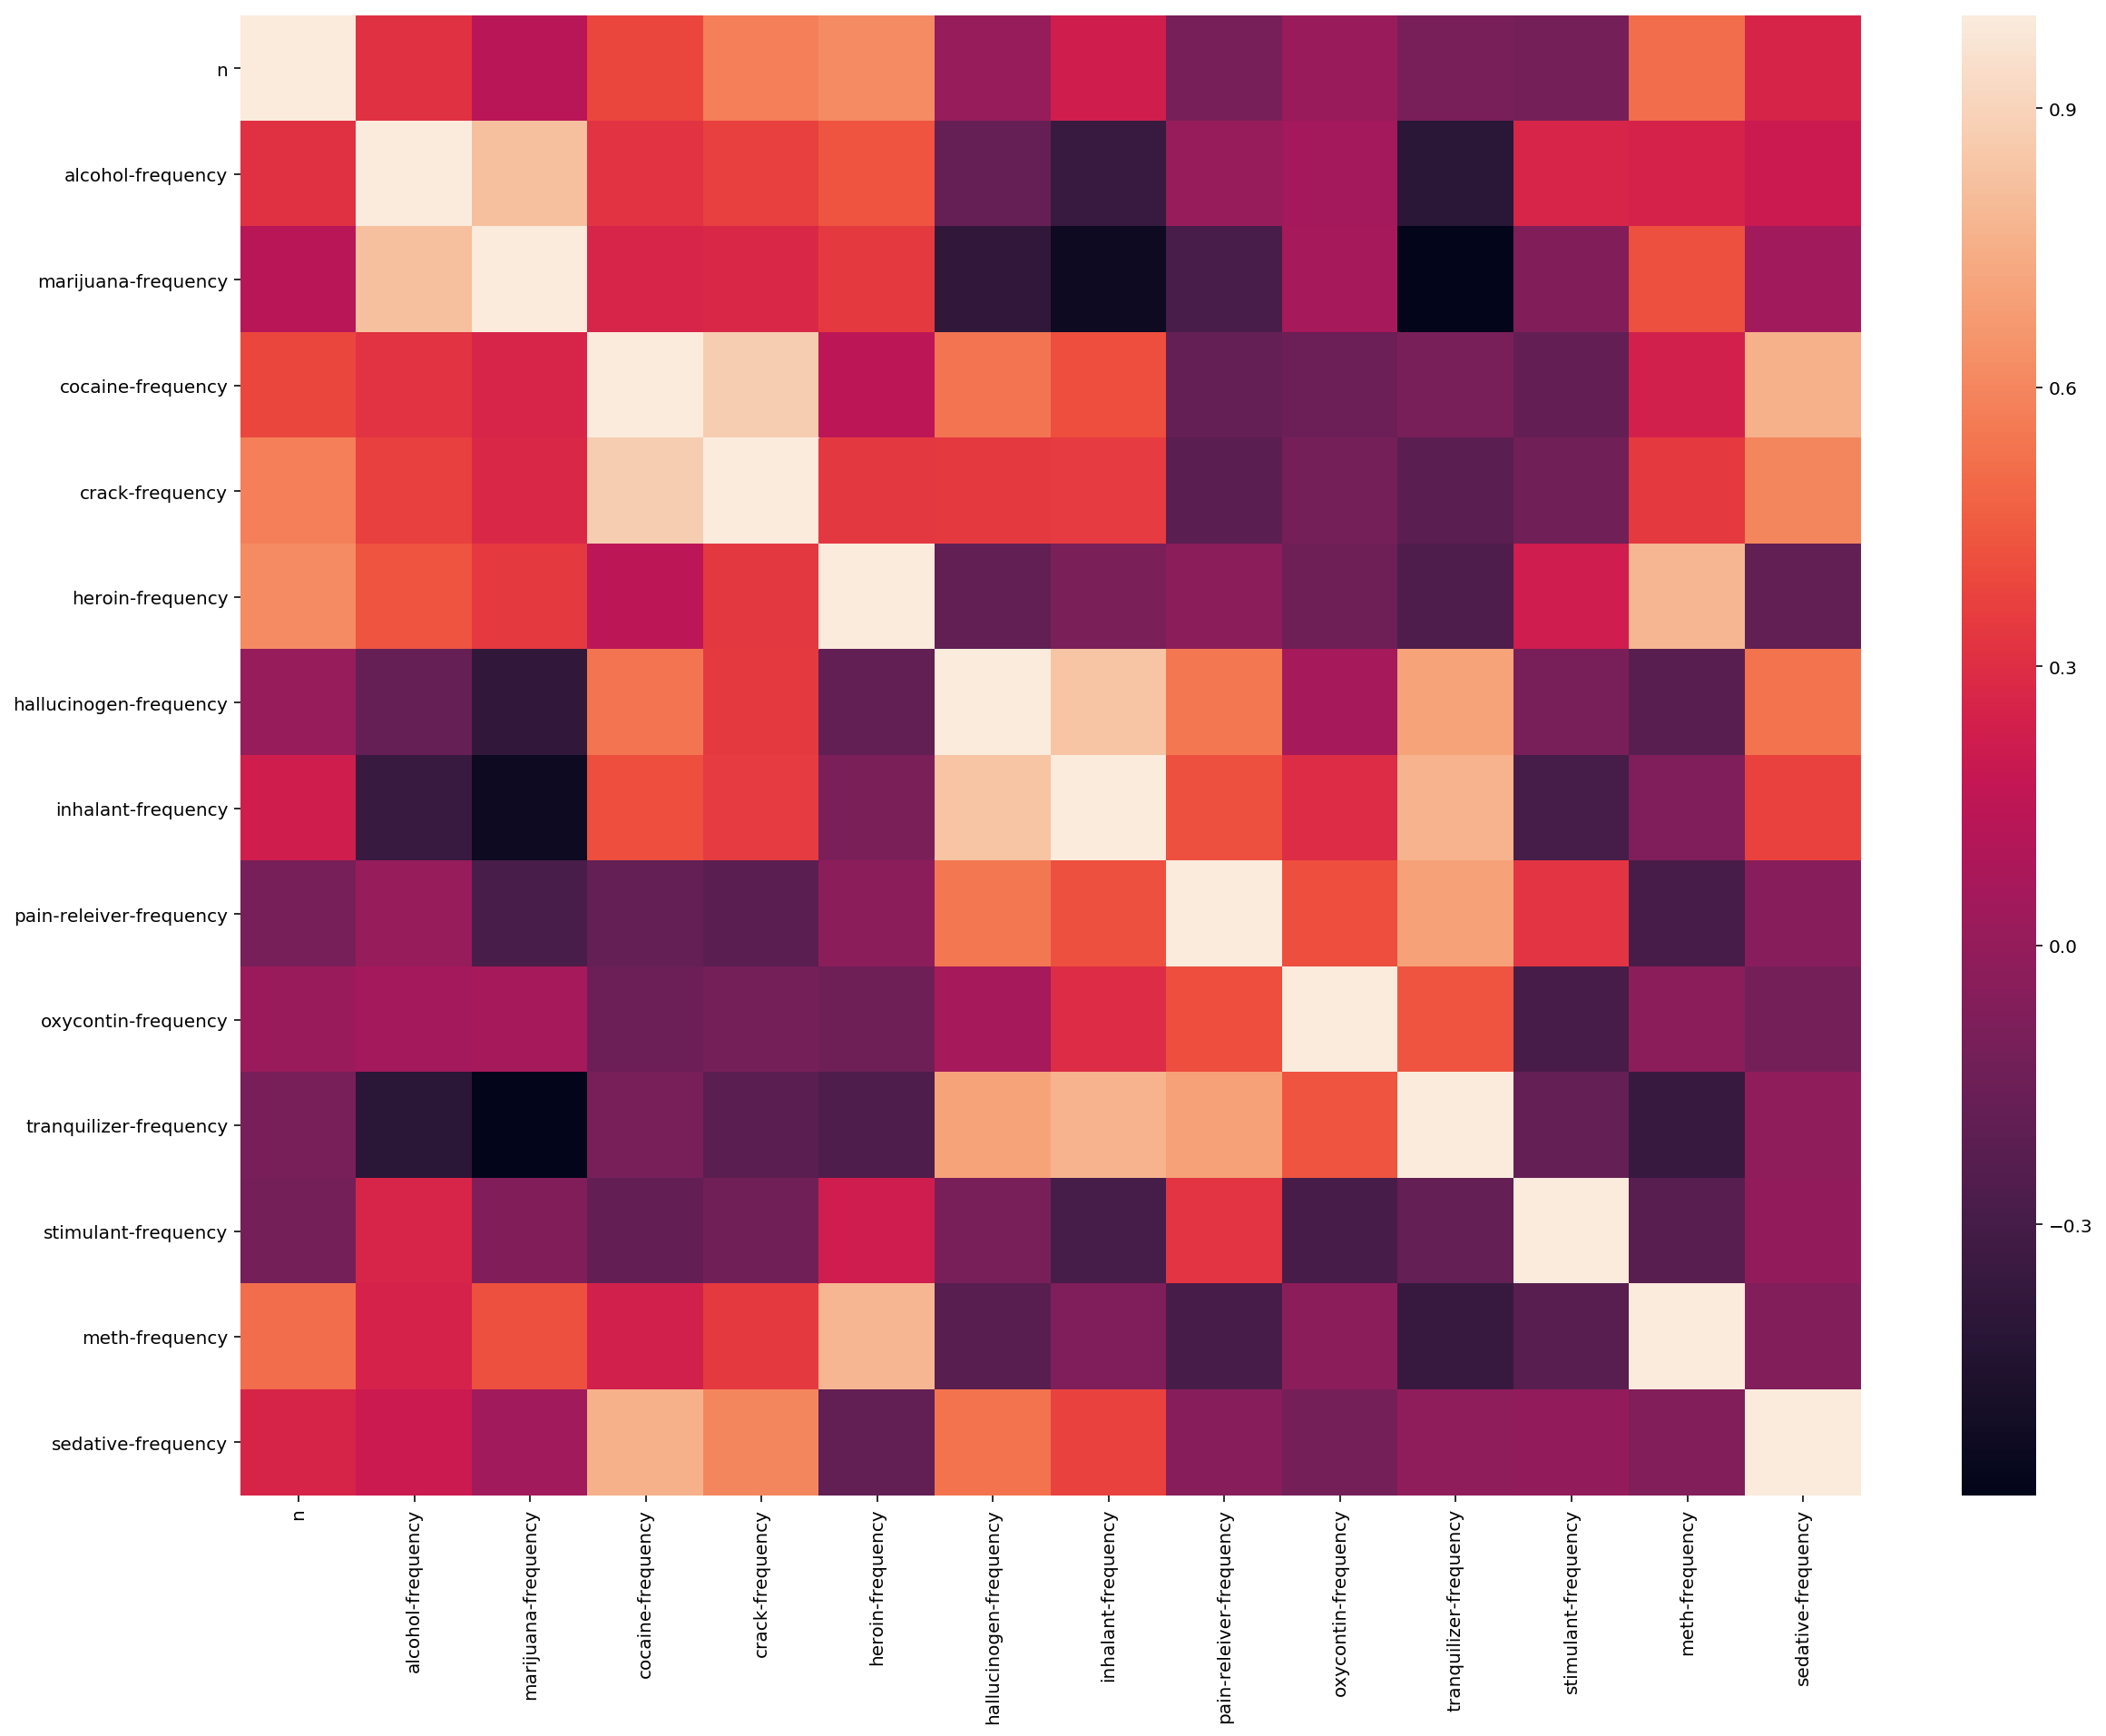

In [670]:
#create a drugs frequency heatmap 
drugs_freq_corr = drugs_freq.corr(method='pearson')
plt.subplots(figsize=(20,15))
sns.heatmap(drugs_freq_corr)

Let's explore the mean frequency of drug use below. 

In [671]:
drugs_freq_new = drugs_freq.copy()
del drugs_freq_new['n']
dfn_mean = drugs_freq_new.mean().sort_values(ascending=False)
dfn_mean

heroin-frequency           68.970588
marijuana-frequency        42.941176
alcohol-frequency          33.352941
meth-frequency             31.735294
stimulant-frequency        31.147059
sedative-frequency         19.382353
pain-releiver-frequency    14.705882
oxycontin-frequency        13.941176
crack-frequency            12.382353
tranquilizer-frequency     11.735294
hallucinogen-frequency      8.411765
cocaine-frequency           7.411765
inhalant-frequency          5.794118
dtype: float64

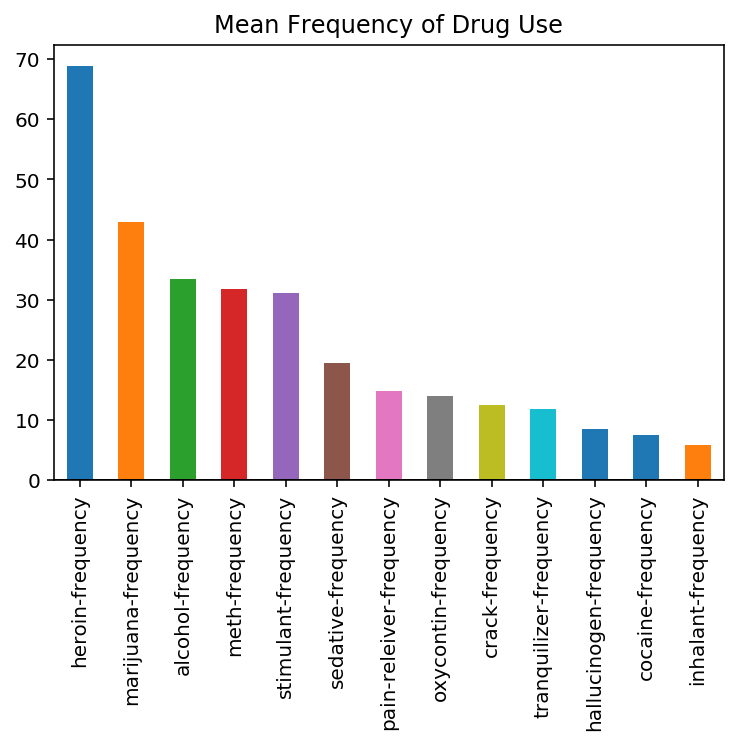

In [672]:
plt.figure()
dfn_mean.plot.bar(title = 'Mean Frequency of Drug Use'); plt.axhline(0, color='k')

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

From the high level overview done, we want to explore if the frequency of drug use is either positively or negatively correlated with the rate of drug use for different classes of drugs (hard and soft). The classification of drugs into hard or soft is one for debate so to keep things simple, we will use the wiki definition: https://simple.wikipedia.org/wiki/Hard_and_soft_drugs

Our 2 hypotheses are:

Hypothesis Null - Frequency of drug abuse is positively correlated with rate of drug abuse for users of hard drugs.<br>
Hypothesis 1 - Frequency of drug abuse is not correlated with rate of drug abuse for users of soft drugs.


These hypotheses will be tested using random drug choices using Pearson's correlation function, on which the null or hypothesis 1 would be accepted.

In [673]:
# Computations for testing Hypothesis Null

# Correlation for hard drugs - heroin
her = stats.pearsonr(drugs['heroin-use'], drugs['heroin-frequency'])
# Correlation for hard drugs - cocaine
coc = stats.pearsonr(drugs['cocaine-use'], drugs['cocaine-frequency'])
# Correlation for hard drugs - meth
meth = stats.pearsonr(drugs['meth-use'], drugs['meth-frequency'])

print('Correlation & P Value for hard drugs - heroin:', her)
print('Correlation & P Value for hard drugs - cocaine:', coc)
print('Correlation & P Value for hard drugs - meth:', sti)

Correlation & P Value for hard drugs - heroin: (-0.044239493258069806, 0.8661176382278033)
Correlation & P Value for hard drugs - cocaine: (-0.07784815495891297, 0.7664831953980948)
Correlation & P Value for hard drugs - meth: (-0.3633576178135256, 0.15168707641370008)


**Report**<br>
We ran our Hypothesis Null on 3 hard drugs - heroin, cocaine and meth using the Pearson correlation function. What we found was for hard drugs, the frequency of drug abuse is negatively correlated with rate of drug abuse. This is seen in the values of less than 0. What we can infer is that when the rate of drug use increases, the frequency of drug use decreases for hard drugs. Therefore, hypothesis null is rejected.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [674]:
sat_scores_corr = sat_scores[['Math', 'Verbal']].corr(method='spearman')

print('Pearson:',sat_scores_correlation)
print('Spearman:',sat_scores_corr)

Pearson:             Rate    Verbal      Math
Rate    1.000000 -0.886432 -0.773746
Verbal -0.886432  1.000000  0.899871
Math   -0.773746  0.899871  1.000000
Spearman:             Math    Verbal
Math    1.000000  0.905205
Verbal  0.905205  1.000000


The Spearman method seems to find more relationship between Verbal and Math than the Pearson method does but I'm not sure what it means. 

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [675]:
np.percentile(sat_scores['Rate'],50)

33.5

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.